# Перцептрон
## Цель работы
Познакомиться с перцептроном как с моделью обучения с учителем в библиотеке sklearn.

## Содержание работы
1. Сгенерируйте данные и обучите на них модель перцептрона.
2. Просмотрите параметры модели, визуализируйте и улучшите ее работу.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Сгенерируйте данные и обучите на них модель перцептрона.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier

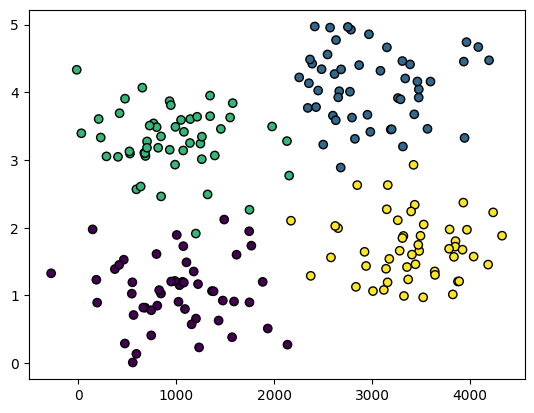

In [3]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [4]:
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X, y)

### 2. Просмотрите параметры модели, визуализируйте и улучшите ее работу.

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [7]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [8]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [9]:
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]])

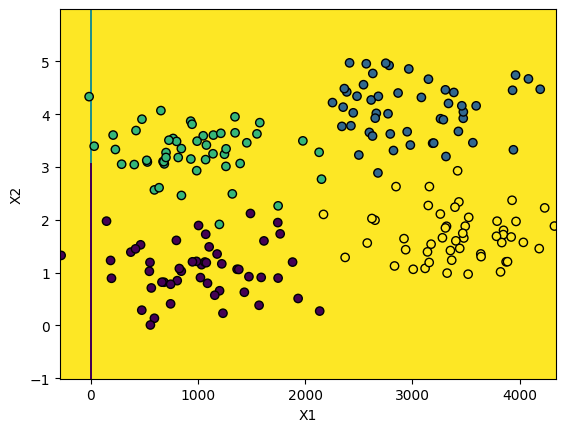

In [10]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Нормализуем данные в стандартные значения

In [11]:
from sklearn.preprocessing import StandardScaler 

In [12]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [13]:
X_scaled = scaler.transform(X)

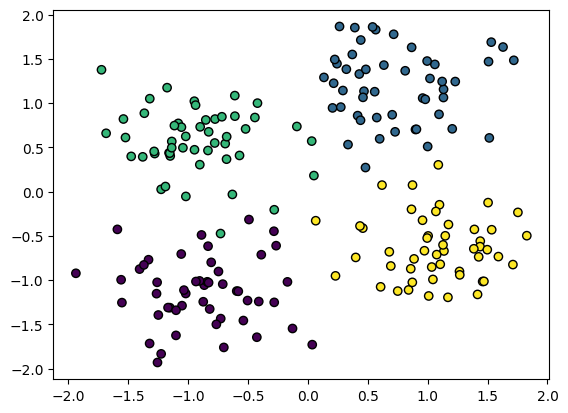

In [14]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)

In [15]:
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X_scaled, y)

c:\Users\Polyak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
confusion_matrix(y, clf.predict(X_scaled))

array([[22,  0, 11, 17],
       [ 0, 38,  0, 12],
       [ 0,  3, 45,  2],
       [ 0,  5,  0, 45]])

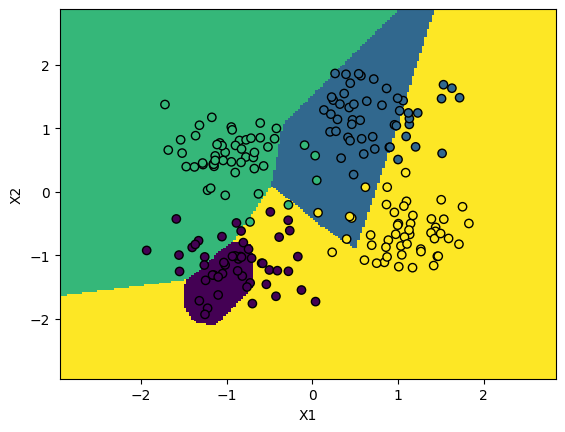

In [17]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [18]:
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.56545595
Iteration 2, loss = 1.56123868
Iteration 3, loss = 1.55705009
Iteration 4, loss = 1.55287787
Iteration 5, loss = 1.54872000
Iteration 6, loss = 1.54458698
Iteration 7, loss = 1.54048323
Iteration 8, loss = 1.53640279
Iteration 9, loss = 1.53234578
Iteration 10, loss = 1.52831051
Iteration 11, loss = 1.52430083
Iteration 12, loss = 1.52030691
Iteration 13, loss = 1.51632930
Iteration 14, loss = 1.51239547
Iteration 15, loss = 1.50848252
Iteration 16, loss = 1.50459114
Iteration 17, loss = 1.50071782
Iteration 18, loss = 1.49688055
Iteration 19, loss = 1.49306291
Iteration 20, loss = 1.48927075
Iteration 21, loss = 1.48549569
Iteration 22, loss = 1.48174507
Iteration 23, loss = 1.47801093
Iteration 24, loss = 1.47429157
Iteration 25, loss = 1.47058971
Iteration 26, loss = 1.46690679
Iteration 27, loss = 1.46323792
Iteration 28, loss = 1.45959085
Iteration 29, loss = 1.45597306
Iteration 30, loss = 1.45237622
Iteration 31, loss = 1.44880253
Iteration 32, los

In [19]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 49,  0,  1],
       [ 1,  0, 49,  0],
       [ 0,  1,  0, 49]])

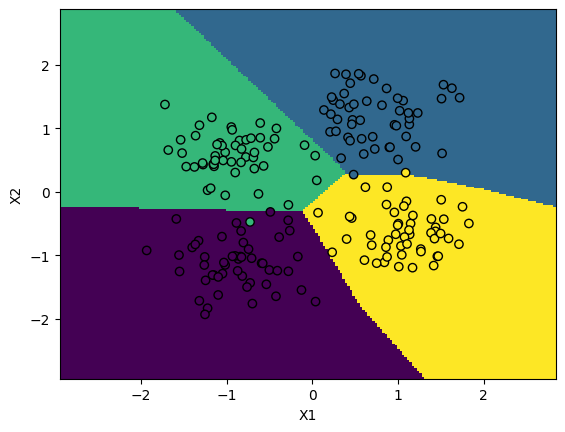

In [20]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [21]:
clf = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=10_000).fit(X_scaled, y)

In [22]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]])

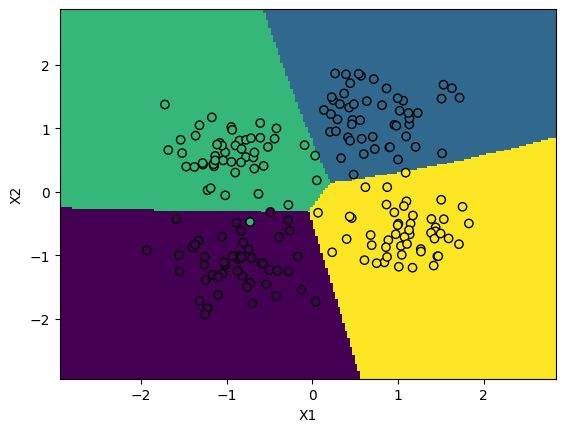

In [23]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Задания для самостоятельного выполнения

### 1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

#### Перцептрон с 1им нейроном

In [24]:
clf = MLPClassifier(hidden_layer_sizes=(1,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.25586624
Iteration 2, loss = 1.25477156
Iteration 3, loss = 1.25368004
Iteration 4, loss = 1.25259183
Iteration 5, loss = 1.25150709
Iteration 6, loss = 1.25042589
Iteration 7, loss = 1.24934830
Iteration 8, loss = 1.24827437
Iteration 9, loss = 1.24720418
Iteration 10, loss = 1.24613779
Iteration 11, loss = 1.24507520
Iteration 12, loss = 1.24401633
Iteration 13, loss = 1.24296139
Iteration 14, loss = 1.24191045
Iteration 15, loss = 1.24086355
Iteration 16, loss = 1.23982072
Iteration 17, loss = 1.23878202
Iteration 18, loss = 1.23774748
Iteration 19, loss = 1.23671713
Iteration 20, loss = 1.23569099
Iteration 21, loss = 1.23466910
Iteration 22, loss = 1.23365147
Iteration 23, loss = 1.23263811
Iteration 24, loss = 1.23162905
Iteration 25, loss = 1.23062429
Iteration 26, loss = 1.22962383
Iteration 27, loss = 1.22862767
Iteration 28, loss = 1.22763581
Iteration 29, loss = 1.22664824
Iteration 30, loss = 1.22566494
Iteration 31, loss = 1.22468539
Iteration 32, los

In [25]:
confusion_matrix(y, clf.predict(X_scaled))

array([[30,  0,  3, 17],
       [ 2,  0, 48,  0],
       [ 2,  0, 48,  0],
       [ 9,  0,  0, 41]])

In [26]:
clf.score(X_scaled, y)

0.595

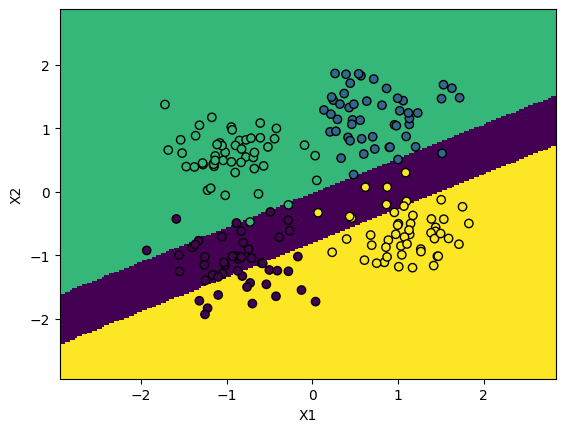

In [27]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### Перцептрон с 2мя нейронами

In [28]:
clf = MLPClassifier(hidden_layer_sizes=(2,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.19960571
Iteration 2, loss = 1.19804543
Iteration 3, loss = 1.19648692
Iteration 4, loss = 1.19493025
Iteration 5, loss = 1.19337545
Iteration 6, loss = 1.19182259
Iteration 7, loss = 1.19027170
Iteration 8, loss = 1.18872285
Iteration 9, loss = 1.18717607
Iteration 10, loss = 1.18563162
Iteration 11, loss = 1.18408956
Iteration 12, loss = 1.18254976
Iteration 13, loss = 1.18101225
Iteration 14, loss = 1.17947656
Iteration 15, loss = 1.17794319
Iteration 16, loss = 1.17641219
Iteration 17, loss = 1.17488360
Iteration 18, loss = 1.17335745
Iteration 19, loss = 1.17183379
Iteration 20, loss = 1.17031263
Iteration 21, loss = 1.16879390
Iteration 22, loss = 1.16727721
Iteration 23, loss = 1.16576352
Iteration 24, loss = 1.16425243
Iteration 25, loss = 1.16274399
Iteration 26, loss = 1.16123819
Iteration 27, loss = 1.15973484
Iteration 28, loss = 1.15823400
Iteration 29, loss = 1.15673586
Iteration 30, loss = 1.15524041
Iteration 31, loss = 1.15374769
Iteration 32, los

In [29]:
confusion_matrix(y, clf.predict(X_scaled))

array([[49,  0,  0,  1],
       [ 0, 50,  0,  0],
       [ 2,  3, 45,  0],
       [ 0,  0,  0, 50]])

In [30]:
clf.score(X_scaled, y)

0.97

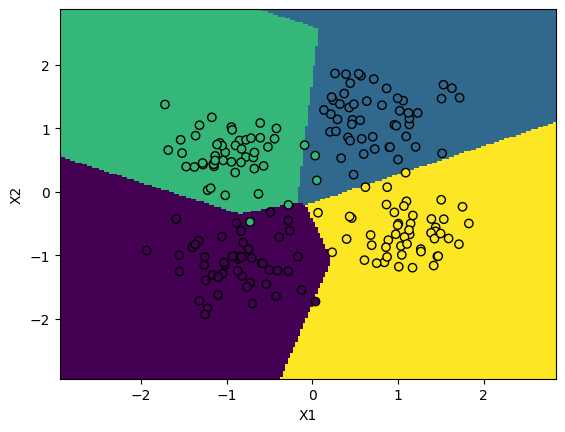

In [31]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### Перцептрон со 100 нейронами

In [32]:
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.49600886
Iteration 2, loss = 1.47881353
Iteration 3, loss = 1.46174093
Iteration 4, loss = 1.44480400
Iteration 5, loss = 1.42799376
Iteration 6, loss = 1.41130728
Iteration 7, loss = 1.39475403
Iteration 8, loss = 1.37833810
Iteration 9, loss = 1.36206465
Iteration 10, loss = 1.34593019
Iteration 11, loss = 1.32992134
Iteration 12, loss = 1.31404326
Iteration 13, loss = 1.29828979
Iteration 14, loss = 1.28266803
Iteration 15, loss = 1.26715778
Iteration 16, loss = 1.25177131
Iteration 17, loss = 1.23651266
Iteration 18, loss = 1.22137762
Iteration 19, loss = 1.20637229
Iteration 20, loss = 1.19149344
Iteration 21, loss = 1.17673961
Iteration 22, loss = 1.16210335
Iteration 23, loss = 1.14758465
Iteration 24, loss = 1.13319000
Iteration 25, loss = 1.11893077
Iteration 26, loss = 1.10480527
Iteration 27, loss = 1.09080439
Iteration 28, loss = 1.07692731
Iteration 29, loss = 1.06317663
Iteration 30, loss = 1.04954926
Iteration 31, loss = 1.03603521
Iteration 32, los

In [33]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]])

In [34]:
clf.score(X_scaled, y)

0.995

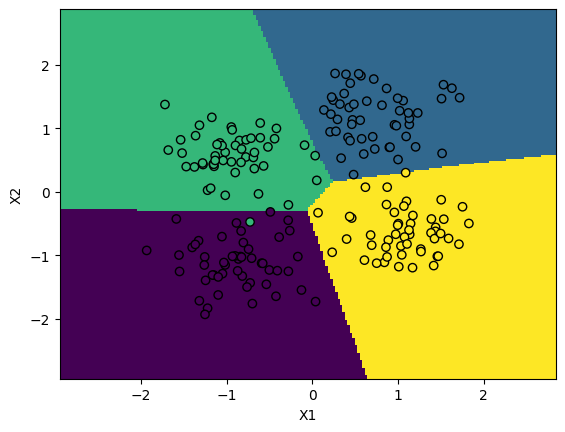

In [35]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

#### 2 скрытых слоя

In [36]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.45305297
Iteration 2, loss = 1.44871463
Iteration 3, loss = 1.44440116
Iteration 4, loss = 1.44012101
Iteration 5, loss = 1.43587415
Iteration 6, loss = 1.43164923
Iteration 7, loss = 1.42745784
Iteration 8, loss = 1.42330202
Iteration 9, loss = 1.41917671
Iteration 10, loss = 1.41508562
Iteration 11, loss = 1.41102145
Iteration 12, loss = 1.40698816
Iteration 13, loss = 1.40297351
Iteration 14, loss = 1.39898216
Iteration 15, loss = 1.39500594
Iteration 16, loss = 1.39105932
Iteration 17, loss = 1.38711340
Iteration 18, loss = 1.38318870
Iteration 19, loss = 1.37928582
Iteration 20, loss = 1.37540602
Iteration 21, loss = 1.37156456
Iteration 22, loss = 1.36774699
Iteration 23, loss = 1.36394731
Iteration 24, loss = 1.36016426
Iteration 25, loss = 1.35641211
Iteration 26, loss = 1.35267926
Iteration 27, loss = 1.34896392
Iteration 28, loss = 1.34526854
Iteration 29, loss = 1.34159754
Iteration 30, loss = 1.33794310
Iteration 31, loss = 1.33429865
Iteration 32, los

In [37]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 49,  0,  1],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]])

In [38]:
clf.score(X_scaled, y)

0.99

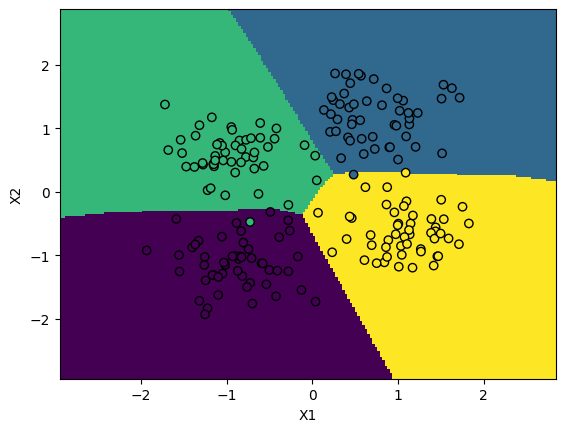

In [39]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### 3 скрытых слоя

In [40]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.46930441
Iteration 2, loss = 1.46385916
Iteration 3, loss = 1.45842761
Iteration 4, loss = 1.45302607
Iteration 5, loss = 1.44767441
Iteration 6, loss = 1.44229674
Iteration 7, loss = 1.43679926
Iteration 8, loss = 1.43129992
Iteration 9, loss = 1.42581062
Iteration 10, loss = 1.42034348
Iteration 11, loss = 1.41492484
Iteration 12, loss = 1.40949349
Iteration 13, loss = 1.40399314
Iteration 14, loss = 1.39841883
Iteration 15, loss = 1.39275227
Iteration 16, loss = 1.38705483
Iteration 17, loss = 1.38136296
Iteration 18, loss = 1.37555988
Iteration 19, loss = 1.36976928
Iteration 20, loss = 1.36409429
Iteration 21, loss = 1.35853055
Iteration 22, loss = 1.35309154
Iteration 23, loss = 1.34782131
Iteration 24, loss = 1.34268387
Iteration 25, loss = 1.33773639
Iteration 26, loss = 1.33300426
Iteration 27, loss = 1.32867585
Iteration 28, loss = 1.32460415
Iteration 29, loss = 1.32065202
Iteration 30, loss = 1.31685789
Iteration 31, loss = 1.31321077
Iteration 32, los

In [41]:
confusion_matrix(y, clf.predict(X_scaled))

array([[49,  0,  1,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]])

In [42]:
clf.score(X_scaled, y)

0.99

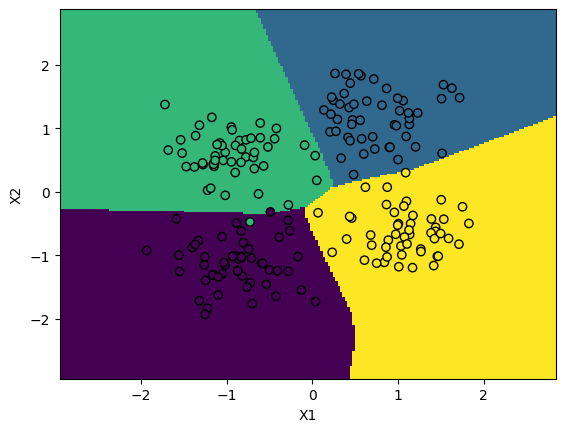

In [43]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### 10 скрытых слоев

In [44]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.43691174
Iteration 2, loss = 1.43498215
Iteration 3, loss = 1.43306400
Iteration 4, loss = 1.43113852
Iteration 5, loss = 1.42919818
Iteration 6, loss = 1.42724708
Iteration 7, loss = 1.42528868
Iteration 8, loss = 1.42330080
Iteration 9, loss = 1.42123860
Iteration 10, loss = 1.41912061
Iteration 11, loss = 1.41695519
Iteration 12, loss = 1.41483780
Iteration 13, loss = 1.41278810
Iteration 14, loss = 1.41067761
Iteration 15, loss = 1.40834852
Iteration 16, loss = 1.40597026
Iteration 17, loss = 1.40355959
Iteration 18, loss = 1.40107470
Iteration 19, loss = 1.39859117
Iteration 20, loss = 1.39619049
Iteration 21, loss = 1.39384853
Iteration 22, loss = 1.39151147
Iteration 23, loss = 1.38912886
Iteration 24, loss = 1.38670098
Iteration 25, loss = 1.38429414
Iteration 26, loss = 1.38194153
Iteration 27, loss = 1.37961801
Iteration 28, loss = 1.37730226
Iteration 29, loss = 1.37500606
Iteration 30, loss = 1.37270159
Iteration 31, loss = 1.37040364
Iteration 32, los

In [45]:
confusion_matrix(y, clf.predict(X_scaled))

array([[49,  0,  1,  0],
       [ 0, 50,  0,  0],
       [ 0,  0, 50,  0],
       [ 0,  0,  0, 50]])

In [46]:
clf.score(X_scaled, y)

0.995

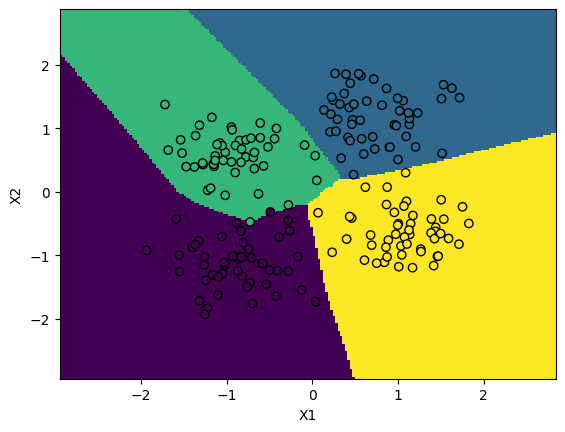

In [47]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

In [48]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.43088995
Iteration 2, loss = 1.42779707
Iteration 3, loss = 1.42469718
Iteration 4, loss = 1.42159350
Iteration 5, loss = 1.41848046
Iteration 6, loss = 1.41537746
Iteration 7, loss = 1.41228464
Iteration 8, loss = 1.40918689
Iteration 9, loss = 1.40606783
Iteration 10, loss = 1.40291656
Iteration 11, loss = 1.39975451
Iteration 12, loss = 1.39658715
Iteration 13, loss = 1.39342176
Iteration 14, loss = 1.39024678
Iteration 15, loss = 1.38705074
Iteration 16, loss = 1.38380761
Iteration 17, loss = 1.38053507
Iteration 18, loss = 1.37720173
Iteration 19, loss = 1.37379725
Iteration 20, loss = 1.37031880
Iteration 21, loss = 1.36682707
Iteration 22, loss = 1.36329406
Iteration 23, loss = 1.35970340
Iteration 24, loss = 1.35605078
Iteration 25, loss = 1.35231646
Iteration 26, loss = 1.34850036
Iteration 27, loss = 1.34463649
Iteration 28, loss = 1.34070404
Iteration 29, loss = 1.33664865
Iteration 30, loss = 1.33248979
Iteration 31, loss = 1.32821590
Iteration 32, los

In [49]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [0.61050961 0.36369059], 
0 1 [-0.8355813   0.63136152], 
0 2 [-0.42803387 -0.60855667], 
0 3 [0.25611579 0.11593246], 
0 4 [-0.66647603 -0.96786867], 
0 5 [-0.28790331  0.9454007 ], 
0 6 [-0.82202194 -1.08883626], 
0 7 [-0.71169105  0.86600148], 
0 8 [-0.47997042  0.96519879], 
0 9 [-1.02428562 -0.21207954], 

1 0 [ 0.79600004 -0.24744773 -0.23248787 -0.30369154  0.19260668  0.13430683
 -0.15925143  0.52919372 -0.29648219 -0.57602896], 
1 1 [-0.02509814  0.71559116 -0.38921028 -0.2772072  -0.448665    0.71592102
 -0.26540048 -0.2297883   0.52775244 -0.2753613 ], 
1 2 [-0.31030392  0.38970299  0.44416274 -0.04300245  0.11816843  0.20957069
 -0.03794051  0.85108807  0.10550665  0.78021364], 
1 3 [ 5.61535257e-02 -1.96089418e-02 -8.84631742e-02  5.98423347e-02
  1.99463587e-07 -4.73054650e-11 -1.02525764e-01 -1.26408821e-02
 -1.41687403e-02 -5.04290791e-04], 
1 4 [-0.82862268  0.03701545  0.28761374  0.01409005  0.7022264  -0.08668989
  0.17892894  0.16932297 -0.47960326  0.27298541]

In [50]:
for i in range(len(clf.intercepts_)):
    print(clf.intercepts_[i])

[ 0.38806116  0.66609734 -0.44676628 -0.64729705  0.87906374  0.69898924
 -0.38810018 -0.18306572  0.64852198  0.68950301]
[ 0.69066379  0.08212921 -0.25354069 -0.36752389 -0.57356345  0.26389992
 -0.50545834  0.80588273 -0.31265868 -0.21732279]
[-0.39190041 -0.34533279  0.40265789  0.06402419 -0.43992898 -0.11988095
 -0.15359989 -0.03027375 -0.37902849 -0.12716067]
[-0.81740467 -0.24612665 -0.87369982  0.2418203 ]


### 4. Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

In [51]:
import time

In [52]:
start = time.time()
clf = MLPClassifier(hidden_layer_sizes=(10, ), max_iter=10_000, verbose=True).fit(X_scaled, y)
end = time.time()
print("Time: ", end - start)

Iteration 1, loss = 1.61693265
Iteration 2, loss = 1.61355030
Iteration 3, loss = 1.61018186
Iteration 4, loss = 1.60683051
Iteration 5, loss = 1.60348788
Iteration 6, loss = 1.60014724
Iteration 7, loss = 1.59681361
Iteration 8, loss = 1.59348586
Iteration 9, loss = 1.59016370
Iteration 10, loss = 1.58683583
Iteration 11, loss = 1.58350725
Iteration 12, loss = 1.58018287
Iteration 13, loss = 1.57686354
Iteration 14, loss = 1.57354056
Iteration 15, loss = 1.57021410
Iteration 16, loss = 1.56689006
Iteration 17, loss = 1.56356813
Iteration 18, loss = 1.56024912
Iteration 19, loss = 1.55693673
Iteration 20, loss = 1.55363164
Iteration 21, loss = 1.55033342
Iteration 22, loss = 1.54703947
Iteration 23, loss = 1.54374571
Iteration 24, loss = 1.54043300
Iteration 25, loss = 1.53712658
Iteration 26, loss = 1.53381938
Iteration 27, loss = 1.53049725
Iteration 28, loss = 1.52717073
Iteration 29, loss = 1.52384147
Iteration 30, loss = 1.52051234
Iteration 31, loss = 1.51718697
Iteration 32, los

In [53]:
start = time.time()
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100), max_iter=10_000, verbose=True).fit(X_scaled, y)
end = time.time()
print("Time: ", end - start)

Iteration 1, loss = 1.39030687
Iteration 2, loss = 1.37298782
Iteration 3, loss = 1.35839703
Iteration 4, loss = 1.34008103
Iteration 5, loss = 1.31810837
Iteration 6, loss = 1.29165524
Iteration 7, loss = 1.26184238
Iteration 8, loss = 1.22864240
Iteration 9, loss = 1.19031012
Iteration 10, loss = 1.14517882
Iteration 11, loss = 1.09399232
Iteration 12, loss = 1.03810802
Iteration 13, loss = 0.97796625
Iteration 14, loss = 0.91372398
Iteration 15, loss = 0.84607941
Iteration 16, loss = 0.77744377
Iteration 17, loss = 0.70912565
Iteration 18, loss = 0.63990556
Iteration 19, loss = 0.56899271
Iteration 20, loss = 0.49563948
Iteration 21, loss = 0.42349805
Iteration 22, loss = 0.35437535
Iteration 23, loss = 0.29109193
Iteration 24, loss = 0.23424163
Iteration 25, loss = 0.18288791
Iteration 26, loss = 0.13761820
Iteration 27, loss = 0.10039137
Iteration 28, loss = 0.07298553
Iteration 29, loss = 0.05521026
Iteration 30, loss = 0.04411527
Iteration 31, loss = 0.03693808
Iteration 32, los

### 5. Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [54]:
from sklearn.datasets import load_iris

In [55]:
X, y = load_iris(return_X_y=True)

In [56]:
X_scaled_iris = scaler.fit_transform(X)

In [57]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled_iris, y)

Iteration 1, loss = 1.10242860
Iteration 2, loss = 1.09759145
Iteration 3, loss = 1.09267956
Iteration 4, loss = 1.08779069
Iteration 5, loss = 1.08281929
Iteration 6, loss = 1.07767281
Iteration 7, loss = 1.07239623
Iteration 8, loss = 1.06701972
Iteration 9, loss = 1.06152045
Iteration 10, loss = 1.05601285
Iteration 11, loss = 1.05048703
Iteration 12, loss = 1.04489708
Iteration 13, loss = 1.03928696
Iteration 14, loss = 1.03363140
Iteration 15, loss = 1.02795153
Iteration 16, loss = 1.02218622
Iteration 17, loss = 1.01633088
Iteration 18, loss = 1.01040095
Iteration 19, loss = 1.00439886
Iteration 20, loss = 0.99829836
Iteration 21, loss = 0.99216141
Iteration 22, loss = 0.98596925
Iteration 23, loss = 0.97972077
Iteration 24, loss = 0.97340947
Iteration 25, loss = 0.96708624
Iteration 26, loss = 0.96075935
Iteration 27, loss = 0.95437039
Iteration 28, loss = 0.94792398
Iteration 29, loss = 0.94146149
Iteration 30, loss = 0.93497405
Iteration 31, loss = 0.92846566
Iteration 32, los

In [58]:
confusion_matrix(y, clf.predict(X_scaled_iris))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

### 6. Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [59]:
from sklearn.datasets import load_diabetes

In [60]:
diabets = load_diabetes()

In [61]:
features = diabets.data

In [62]:
data = pd.DataFrame(features, columns = diabets.feature_names)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [63]:
X_diabetes, y_diabetes = diabets.data, diabets.target

In [64]:
X_diabetes.shape

(442, 10)

In [65]:
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

In [66]:
clf = MLPClassifier(hidden_layer_sizes=(12, 12), max_iter=10_000, verbose=True).fit(X_diabetes_scaled, y_diabetes)

Iteration 1, loss = 5.37040155
Iteration 2, loss = 5.36560004
Iteration 3, loss = 5.36155237
Iteration 4, loss = 5.35779394
Iteration 5, loss = 5.35418453
Iteration 6, loss = 5.35063537
Iteration 7, loss = 5.34698865
Iteration 8, loss = 5.34355888
Iteration 9, loss = 5.34007758
Iteration 10, loss = 5.33654615
Iteration 11, loss = 5.33298748
Iteration 12, loss = 5.32927616
Iteration 13, loss = 5.32544824
Iteration 14, loss = 5.32149937
Iteration 15, loss = 5.31728973
Iteration 16, loss = 5.31320294
Iteration 17, loss = 5.30872486
Iteration 18, loss = 5.30421166
Iteration 19, loss = 5.29941378
Iteration 20, loss = 5.29436266
Iteration 21, loss = 5.28916259
Iteration 22, loss = 5.28349598
Iteration 23, loss = 5.27768937
Iteration 24, loss = 5.27172339
Iteration 25, loss = 5.26536439
Iteration 26, loss = 5.25905848
Iteration 27, loss = 5.25227998
Iteration 28, loss = 5.24544408
Iteration 29, loss = 5.23817276
Iteration 30, loss = 5.23079233
Iteration 31, loss = 5.22313439
Iteration 32, los

In [67]:
confusion_matrix(y_diabetes, clf.predict(X_diabetes_scaled))

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], shape=(214, 214))

In [68]:
clf.score(X_diabetes_scaled, y_diabetes)

0.8665158371040724